In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

In [ ]:
train_len = len(train_data)
test_len = len(test_data)

In [ ]:
print(train_len, test_len)

In [9]:
train_data.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [10]:
test_data.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [11]:
sample_submission.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 22 columns):
customer_id       28831 non-null object
age               28831 non-null int64
job               28831 non-null object
marital           28831 non-null object
education         28831 non-null object
default           28831 non-null object
housing           28831 non-null object
loan              28831 non-null object
contact           28831 non-null object
month             28831 non-null object
day_of_week       28831 non-null object
duration          28831 non-null float64
campaign          28831 non-null int64
pdays             28831 non-null int64
previous          28831 non-null int64
poutcome          28831 non-null object
emp_var_rate      28831 non-null float64
cons_price_idx    28831 non-null float64
cons_conf_idx     28831 non-null float64
euribor3m         28831 non-null float64
nr_employed       28831 non-null float64
subscribed        28831 non-null int64
dtypes: fl

In [14]:
train_data.shape

(28831, 22)

In [15]:
test_data.shape

(12357, 21)

In [16]:
train_data.subscribed.value_counts()

0    25580
1     3251
Name: subscribed, dtype: int64

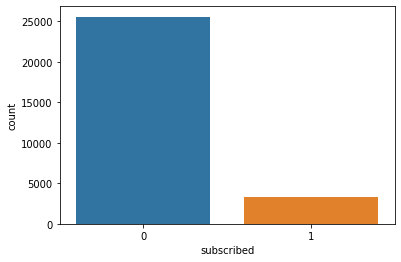

In [17]:
sns.countplot(train_data.subscribed);

In [19]:
# categorical features
cat_cols = ["job", "marital", "education", "default", "housing", "loan",
           "contact", "month", "day_of_week", "poutcome"]

In [20]:
train_label = train_data["subscribed"]
train_data_new = train_data.drop(["subscribed"], axis=1)

In [21]:
# join train and test data for easy pre
all_data = pd.concat([train_data_new, test_data])

In [22]:
all_data_id = all_data.customer_id

In [23]:
all_data = all_data.drop(["customer_id"], axis=1)

In [24]:
all_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,31,admin.,married,university.degree,no,no,no,cellular,dec,mon,1.283333,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5
1,31,technician,single,university.degree,no,no,no,telephone,may,fri,0.200000,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1
2,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,4.616667,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
3,36,services,married,university.degree,no,no,no,cellular,may,thu,1.166667,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1
4,34,admin.,single,high.school,no,no,no,cellular,may,fri,19.683333,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1


In [25]:
for cols in cat_cols:
    unique_items = pd.unique(all_data[cols])
    print(f"{cols}:")
    
    print(f"Length of unique values: {len(unique_items)}")
    print(unique_items)

job:
Length of unique values: 12
['admin.' 'technician' 'blue-collar' 'services' 'entrepreneur'
 'unemployed' 'housemaid' 'management' 'unknown' 'self-employed' 'retired'
 'student']
marital:
Length of unique values: 4
['married' 'single' 'divorced' 'unknown']
education:
Length of unique values: 8
['university.degree' 'basic.6y' 'high.school' 'basic.4y'
 'professional.course' 'basic.9y' 'unknown' 'illiterate']
default:
Length of unique values: 3
['no' 'unknown' 'yes']
housing:
Length of unique values: 3
['no' 'yes' 'unknown']
loan:
Length of unique values: 3
['no' 'yes' 'unknown']
contact:
Length of unique values: 2
['cellular' 'telephone']
month:
Length of unique values: 10
['dec' 'may' 'nov' 'jul' 'jun' 'mar' 'aug' 'oct' 'apr' 'sep']
day_of_week:
Length of unique values: 5
['mon' 'fri' 'thu' 'tue' 'wed']
poutcome:
Length of unique values: 3
['failure' 'nonexistent' 'success']


In [26]:
all_data_encoded = pd.get_dummies(data=all_data, columns=cat_cols)

In [27]:
all_data_encoded.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,1.283333,3,999,1,-2.97,46.3565,-23.10,1.711,5023.5,...,0,0,0,1,0,0,0,1,0,0
1,31,0.200000,4,999,0,-1.77,46.4465,-32.34,2.252,5099.1,...,0,0,1,0,0,0,0,0,1,0
2,47,4.616667,2,999,0,1.13,46.9970,-25.48,5.862,5191.0,...,0,0,0,0,1,0,0,0,1,0
3,36,1.166667,1,999,1,-1.77,46.4465,-32.34,2.329,5099.1,...,0,0,0,0,1,0,0,1,0,0
4,34,19.683333,9,999,0,-1.77,46.4465,-32.34,2.252,5099.1,...,0,0,1,0,0,0,0,0,1,0


In [28]:
pd.unique(all_data.pdays)

array([999,   6,   7,   3,  11,  14,  10,   9,   4,   2,   8,  12,  13,
         0,   5,  15,  16,   1,  18,  17,  22,  21,  27,  20,  19,  25,
        26], dtype=int64)

In [29]:
all_data.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [30]:
train_label[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: subscribed, dtype: int64

In [31]:
train_data_encoded = all_data_encoded.iloc[:train_len]
test_data_encoded = all_data_encoded.iloc[train_len:]

In [32]:
# check if new test and train data is same as original test and train data
train_len == len(train_data_encoded)

True

In [33]:
test_len == len(test_data_encoded)

True

In [34]:
s_fold = StratifiedKFold(n_splits=5)

In [35]:
# logistic regression model
lr = LogisticRegression(n_jobs=-1, )

In [36]:
param_grid = [{"penalty": ["l2"],
              "C": [0.1, 0.5, 1.0, 2.0, 5.0]},
              {"penalty": ["l1"],
               "solver": ["saga"],
              "C": [0.1, 0.5, 1.0, 2.0, 5.0]}
             ]

In [37]:
lr_grid = GridSearchCV(lr, param_grid=param_grid, cv=s_fold)

In [38]:
lr_grid.fit(train_data_encoded, train_label)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed 

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1.0, 2.0, 5.0], 'penalty': ['l2']},
                         {'C': [0.1, 0.5, 1.0, 2.0, 5.0], 'penalty': ['l1'],
                          'solver': ['saga']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [39]:
lr_grid.best_score_

0.9100620859491519

In [41]:
best_params = lr_grid.best_params_

In [42]:
best_params

{'C': 2.0, 'penalty': 'l2'}

In [43]:
lr_best = LogisticRegression(**best_params, max_iter=2000)

In [44]:
lr_best.fit(train_data_encoded, train_label)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting on test data

In [45]:
test_id = all_data_id.iloc[:train_len]

In [46]:
test_id[:]

0        customer_id_39075
1        customer_id_34855
2         customer_id_7107
3        customer_id_31614
4        customer_id_34878
5        customer_id_24606
6        customer_id_13094
7        customer_id_36912
8        customer_id_27834
9         customer_id_9302
10       customer_id_31160
11       customer_id_22809
12       customer_id_31795
13        customer_id_9333
14       customer_id_16750
15       customer_id_26843
16       customer_id_30667
17       customer_id_13405
18       customer_id_14518
19        customer_id_5245
20        customer_id_1715
21       customer_id_27346
22       customer_id_20496
23       customer_id_41005
24       customer_id_15709
25       customer_id_29276
26       customer_id_29288
27       customer_id_28971
28       customer_id_19832
29       customer_id_11176
               ...        
28801     customer_id_1267
28802     customer_id_1899
28803    customer_id_35773
28804    customer_id_19118
28805      customer_id_189
28806     customer_id_2747
2

In [47]:
predictions = lr_best.predict(test_data_encoded)

In [48]:
submissions_df = pd.DataFrame({"customer_id": test_data.customer_id, "subscribed": predictions})

In [49]:
submissions_df.head()

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0


In [51]:
submissions_df.to_csv("logistic_reg_1.csv", index=False)